In [ ]:
# dataset link ----https://www.kaggle.com/datasets/nehaprabhavalkar/indian-products-on-amazon/data

# To Run File here

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator
import nltk 
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
from sklearn.metrics import accuracy_score


## load the data 

In [5]:
df1 = pd.read_csv('amazon_reviews.csv') # read the dataset

## data preprocessing

In [6]:
df1.head() # it shows top rows
# df1.tail() # its shows last rows

,rating,text
0,3,I order 3 of them and one of the item is bad q...
1,4,Bulk is always the less expensive way to go fo...
2,5,Well they are not Duracell but for the price i...
3,5,Seem to work as well as name brand batteries a...
4,5,These batteries are very long lasting the pric...


In [7]:
def map_sentiment(rating):
    if rating in [4, 5]:
        return 'positive'
    elif rating == 3:
        return 'neutral'
    elif rating in [1, 2]:
        return 'negative'
    else:
        return 'unknown'  # Handle other cases if any

# Apply the function to create the 'sentiment' column
df1['sentiment'] = df1['rating'].apply(map_sentiment)

# Display the updated DataFr
df1

,rating,text,sentiment
0,3,I order 3 of them and one of the item is bad q...,neutral
1,4,Bulk is always the less expensive way to go fo...,positive
2,5,Well they are not Duracell but for the price i...,positive
3,5,Seem to work as well as name brand batteries a...,positive
4,5,These batteries are very long lasting the pric...,positive
...,...,...,...
28327,5,I got 2 of these for my 8 yr old twins. My 11 ...,positive
28328,4,I bought this for my niece for a Christmas gif...,positive
28329,5,"Very nice for light internet browsing, keeping...",positive
28330,5,This Tablet does absolutely everything I want!...,positive


In [8]:
df1.columns # to check columns names in our dataset

Index(['rating', 'text', 'sentiment'], dtype='object')

In [9]:
df1.isnull().sum() # to check missing values in our dataset

rating       0
text         0
sentiment    0
dtype: int64

In [10]:
df1.dropna(axis=0,inplace=True) #drop nan values from data set

In [11]:
# df1.to_csv('review_clean.csv',index=False)

In [13]:
df1.sentiment.value_counts() # to check count of sentiment

sentiment
positive    25545
negative     1581
neutral      1206
Name: count, dtype: int64

## data cleaning

In [16]:
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

lemmatizer = WordNetLemmatizer()
corpus = []

for index, row in df1.iterrows():
    review = re.sub('[^a-zA-Z]', ' ', row['text'])  # removing all characters other than alphabets
    review = review.lower()  # Lowering all cases
    review = review.split()  # Splitting the words
    review = [lemmatizer.lemmatize(word) for word in review if word not in set(stopwords.words('english'))]  # Removing stopwords
    review = ' '.join(review)
    corpus.append(review)


## data visualization

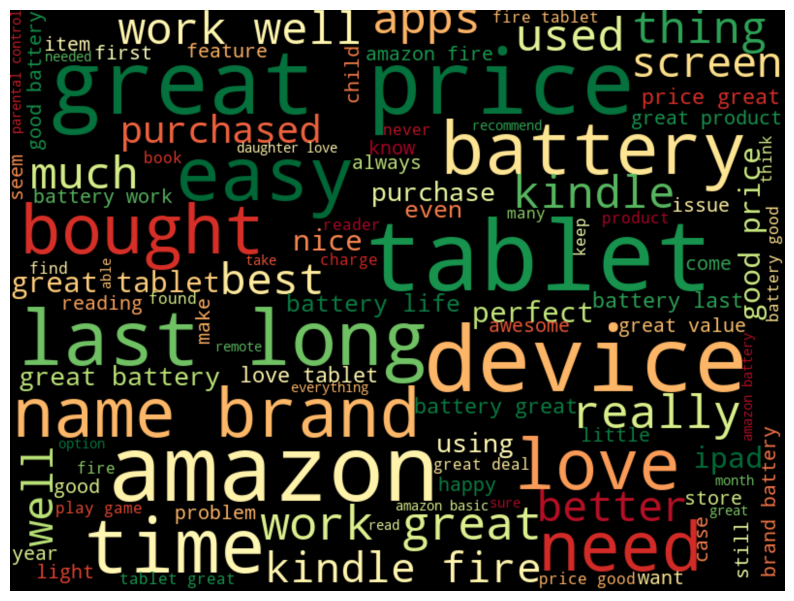

In [17]:
word_cloud = WordCloud(width = 800,
                       height = 600,
                       colormap = 'RdYlGn', 
                       margin = 0,
                       max_words = 100,  
                       min_word_length = 4,
                       max_font_size = 100, 
                       background_color = 'black').generate(' '.join(corpus))


plt.figure(figsize = (10, 10))
plt.imshow(word_cloud, interpolation = 'quadric')
plt.axis('off')
plt.show()

# Model Modelling

In [18]:
from sklearn.model_selection import train_test_split # for deviding dataset import 
from sklearn.metrics import classification_report,confusion_matrix

## 1:Using Bag of Words

In [19]:
# Converting the Words to Vector using Bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=2500,ngram_range=(1,3)) # top 2500 features are taken 
X=cv.fit_transform(corpus).toarray()
y=df1['sentiment']

In [20]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [21]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1,stratify=y)

In [22]:
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
x_train, y_train = SMOTE().fit_resample(x_train, y_train)
x_test, y_test = SMOTE().fit_resample(x_test, y_test)
# lets print the shape of x and y after resampling it
print(x_train.shape)
print(y_train.shape)

# under sampling to balance the data
# from imblearn.under_sampling import RandomUnderSampler
# rus = RandomUnderSampler()
# x_train, y_train = rus.fit_resample(x_train, y_train)
# x_test, y_test = rus.fit_resample(x_train, y_train)

(61305, 2500)
(61305,)


In [23]:
y_train.value_counts()

sentiment
positive    20435
neutral     20435
negative    20435
Name: count, dtype: int64

# bylstm

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
# # Load the Amazon review dataset
dataset_path = 'reviews_clean.csv'
df1 = pd.read_csv(dataset_path)

# Preprocess the data
max_words = 10000
max_len = 256
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(df1['text'])

sequences = tokenizer.texts_to_sequences(df1['text'])
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

# Convert string labels to numerical values
label_encoder = LabelEncoder()
df1['sentiment'] = label_encoder.fit_transform(df1['sentiment'])
num_classes = len(label_encoder.classes_)

labels = np.array(df1['sentiment'])

# Convert labels to categorical for multiclass classification
y_train = to_categorical(labels, num_classes=num_classes)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(padded_sequences, y_train, test_size=0.2, random_state=42)

# Build the model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate on the test set
by_y_pred = np.argmax(model.predict(x_test), axis=-1)

# Calculate metrics
accuracy = accuracy_score(np.argmax(y_test, axis=-1), by_y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(np.argmax(y_test, axis=-1), by_y_pred, average='weighted')

# Print metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Generate classification report
class_names = [str(label) for label in label_encoder.classes_]

# Generate classification report
print("\nClassification Report:")
print(classification_report(np.argmax(y_test, axis=-1), by_y_pred, target_names=class_names))


Epoch 1/5
567/567 [==============================] - 243s 416ms/step - loss: 0.4312 - accuracy: 0.8884 - val_loss: 0.3280 - val_accuracy: 0.9060
Epoch 2/5
567/567 [==============================] - 253s 447ms/step - loss: 0.2779 - accuracy: 0.9077 - val_loss: 0.2431 - val_accuracy: 0.9190
Epoch 3/5
567/567 [==============================] - 234s 412ms/step - loss: 0.2140 - accuracy: 0.9275 - val_loss: 0.2180 - val_accuracy: 0.9274
Epoch 4/5
567/567 [==============================] - 214s 377ms/step - loss: 0.1858 - accuracy: 0.9346 - val_loss: 0.2152 - val_accuracy: 0.9318
Epoch 5/5
178/178 [==============================] - 17s 89ms/step


d:\Codebook\NLP\env\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Codebook\NLP\env\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.9255337921298747
Precision: 0.8864978449452534
Recall: 0.9255337921298747
F1 Score: 0.9054667605653306

Classification Report:


TypeError: object of type 'numpy.int64' has no len()

In [26]:
# import pickle

# # Save the Tokenizer and LabelEncoder to pickle files
# tokenizer_file_path = 'tokenizer.pkl'
# label_encoder_file_path = 'label_encoder.pkl'

# # Save Tokenizer
# with open(tokenizer_file_path, 'wb') as tokenizer_file:
#     pickle.dump(tokenizer, tokenizer_file)

# # Save LabelEncoder
# with open(label_encoder_file_path, 'wb') as label_encoder_file:
#     pickle.dump(label_encoder, label_encoder_file)



In [27]:
# # Save the model
# model.save('bylstm_model.h5')

In [1]:
import pickle
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
# Load Tokenizer
with open('catboost_info/tokenizer.pkl', 'rb') as tokenizer_file:
    loaded_tokenizer = pickle.load(tokenizer_file)

# Load LabelEncoder
with open('catboost_info/label_encoder.pkl', 'rb') as label_encoder_file:
    loaded_label_encoder = pickle.load(label_encoder_file)

# Load the saved model
loaded_model = load_model(r'catboost_info\bylstm_model.h5')
max_len = 256
def predict_sentiment(review_text, tokenizer, label_encoder, model, max_len):
    # Tokenize and pad the user-provided review
    user_sequence = tokenizer.texts_to_sequences([review_text])
    user_padded_sequence = pad_sequences(user_sequence, maxlen=max_len, padding='post', truncating='post')

    # Make a prediction using the loaded model
    prediction = model.predict(user_padded_sequence)[0]

    # Get the predicted class
    predicted_class = np.argmax(prediction)

    # Map the predicted class to the sentiment label
    sentiment_labels = list(label_encoder.classes_)
    predicted_sentiment = sentiment_labels[predicted_class]

    return predicted_sentiment



d:\Codebook\NLP\env\lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 1.3.2 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [3]:
user_review = """A battery is a battery these work just as good if not better than the name brands like Duracell or Enginzer"""
predicted_sentiment = predict_sentiment(user_review, loaded_tokenizer, loaded_label_encoder, loaded_model, max_len)
print(f"Predicted Sentiment: {predicted_sentiment}")

1/1 [==============================] - 0s 185ms/step
Predicted Sentiment: positive


## hybride model

In [31]:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import LabelEncoder
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense

In [36]:
# df1.to_csv('reviews_clean.csv',index=False)

In [37]:

import pandas as pd
df = pd.read_csv('reviews_clean.csv')

lemmatizer = WordNetLemmatizer()
corpus = []

for index, row in df.iterrows():
    review = re.sub('[^a-zA-Z]', ' ', row['text'])  # removing all characters other than alphabets
    review = review.lower()  # Lowering all cases
    review = review.split()  # Splitting the words
    review = [lemmatizer.lemmatize(word) for word in review if word not in set(stopwords.words('english'))]  # Removing stopwords
    review = ' '.join(review)
    corpus.append(review)

# Generate some example data for a classification problem with 3 classes
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=2500,ngram_range=(1,3)) # top 2500 features are taken 
X=cv.fit_transform(corpus).toarray()
y=df['sentiment']

# Split the data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1,stratify=y)

# Train individual models
catboost_model = CatBoostClassifier(iterations=10, depth=5, learning_rate=0.1, loss_function='MultiClass', random_state=42)
xgboost_model = XGBClassifier(objective='multi:softmax', max_depth=5, learning_rate=0.1, n_estimators=100, random_state=42)
lgbm_model = LGBMClassifier(num_leaves=31, learning_rate=0.05, n_estimators=100, random_state=42)

catboost_model.fit(X_train, y_train)
xgboost_model.fit(X_train, y_train)
lgbm_model.fit(X_train, y_train)

# Make predictions on the test set
catboost_preds = catboost_model.predict(X_test)
xgboost_preds = xgboost_model.predict(X_test)
lgbm_preds = lgbm_model.predict(X_test)

# Create a meta-model (StackingClassifier) and train it on the predictions of the individual models
meta_model = StackingClassifier(estimators=[
    ('catboost', catboost_model),
    ('xgboost', xgboost_model),
    ('lgbm', lgbm_model),
      # Using MLP as a placeholder for BiLSTM
], final_estimator= LGBMClassifier(num_leaves=31, learning_rate=0.05, n_estimators=100, random_state=42))

# Fit the meta-model on the predictions
meta_model.fit(np.column_stack((catboost_preds, xgboost_preds, lgbm_preds)), y_test)

# Make predictions using the stacked model
stacked_preds = meta_model.predict(np.column_stack((catboost_preds, xgboost_preds, lgbm_preds)))

# Evaluate the performance of the stacked model
stacked_accuracy = accuracy_score(y_test, stacked_preds)
stacked_classification_report = classification_report(y_test, stacked_preds)
print(f"Stacked Model Accuracy: {stacked_accuracy}")
print("Stacked Model Classification Report:")
print(stacked_classification_report)


0:	learn: 1.0616650	total: 279ms	remaining: 2.51s
1:	learn: 1.0329388	total: 391ms	remaining: 1.56s
2:	learn: 1.0079703	total: 537ms	remaining: 1.25s
3:	learn: 0.9878902	total: 677ms	remaining: 1.01s
4:	learn: 0.9696674	total: 865ms	remaining: 865ms
5:	learn: 0.9553087	total: 1.01s	remaining: 676ms
6:	learn: 0.9423027	total: 1.16s	remaining: 497ms
7:	learn: 0.9316915	total: 1.3s	remaining: 326ms
8:	learn: 0.9207563	total: 1.45s	remaining: 161ms
9:	learn: 0.9126780	total: 1.57s	remaining: 0us
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.486630 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6915
[LightGBM] [Info] Number of data points in the train set: 61305, number of used features: 2478
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from sc

In [38]:
stacked_accuracy

0.6598173515981736

## Albert Bilstm 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support
from transformers import AlbertTokenizer, AlbertModel
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Embedding, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Load the Amazon review dataset
dataset_path = 'reviews_clean.csv'
df = pd.read_csv(dataset_path)

# Preprocess the data
max_len = 256
albert_tokenizer = AlbertTokenizer.from_pretrained('albert-base-v2')

# Tokenize and pad sequences
sequences = [albert_tokenizer.encode(text, max_length=max_len, truncation=True, padding='max_length') for text in df['text']]
padded_sequences = np.array(sequences)

# Convert string labels to numerical values
label_encoder = LabelEncoder()
df['sentiment'] = label_encoder.fit_transform(df['sentiment'])
num_classes = len(label_encoder.classes_)

labels = np.array(df['sentiment'])

# Convert labels to categorical for multiclass classification
y_train = to_categorical(labels, num_classes=num_classes)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(padded_sequences, y_train, test_size=0.2, random_state=42)

# Build the model
embedding_dim = 128

model = Sequential()
model.add(Embedding(input_dim=albert_tokenizer.vocab_size, output_dim=embedding_dim, input_length=max_len))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate on the test set
by_y_pred = np.argmax(model.predict(x_test), axis=-1)

# Calculate metrics
accuracy = accuracy_score(np.argmax(y_test, axis=-1), by_y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(np.argmax(y_test, axis=-1), by_y_pred, average='weighted')

# Print metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


C:\Users\deepp\AppData\Roaming\Python\Python39\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
spiece.model: 100%|██████████| 760k/760k [00:00<00:00, 3.02MB/s]
d:\Codebook\NLP\env\lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\deepp\.cache\huggingface\hub\models--albert-base-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Pytho

Epoch 1/10
567/567 [==============================] - 159s 276ms/step - loss: 0.3731 - accuracy: 0.9014 - val_loss: 0.2748 - val_accuracy: 0.9146
Epoch 2/10
567/567 [==============================] - 159s 280ms/step - loss: 0.2323 - accuracy: 0.9252 - val_loss: 0.2143 - val_accuracy: 0.9290
Epoch 3/10
567/567 [==============================] - 149s 263ms/step - loss: 0.1874 - accuracy: 0.9366 - val_loss: 0.2003 - val_accuracy: 0.9347
Epoch 4/10
567/567 [==============================] - 156s 276ms/step - loss: 0.1619 - accuracy: 0.9438 - val_loss: 0.1956 - val_accuracy: 0.9332
Epoch 5/10
567/567 [==============================] - 149s 263ms/step - loss: 0.1462 - accuracy: 0.9496 - val_loss: 0.1978 - val_accuracy: 0.9391
Epoch 6/10
567/567 [==============================] - 135s 237ms/step - loss: 0.1282 - accuracy: 0.9565 - val_loss: 0.2202 - val_accuracy: 0.9418
Epoch 7/10
567/567 [==============================] - 129s 228ms/step - loss: 0.1147 - accuracy: 0.9628 - val_loss: 0.1961 -

TypeError: object of type 'numpy.int64' has no len()

In [11]:
# Convert numerical labels to strings
class_names = [str(label) for label in label_encoder.classes_]

# Generate classification report
print("\nClassification Report:")
print(classification_report(np.argmax(y_test, axis=-1), by_y_pred, target_names=class_names))



Classification Report:
              precision    recall  f1-score   support

    negative       0.73      0.70      0.71       325
     neutral       0.55      0.26      0.35       254
    positive       0.96      0.98      0.97      5088

    accuracy                           0.94      5667
   macro avg       0.75      0.65      0.68      5667
weighted avg       0.93      0.94      0.93      5667



## save the models

In [4]:
import pickle
import joblib  # For LabelEncoder

# ... (previous code)

# Save the Tokenizer
tokenizer_save_path = 'albert_tokenizer'
albert_tokenizer.save_pretrained(tokenizer_save_path)

# Save LabelEncoder
label_encoder_file_path = 'label_encoder.joblib'
joblib.dump(label_encoder, label_encoder_file_path)

# Save the model architecture to JSON
model_architecture_path = 'bylstm_model_architecture.json'
with open(model_architecture_path, 'w') as json_file:
    json_file.write(model.to_json())

# Save the model weights
model_weights_path = 'bylstm_model_weights.h5'
model.save_weights(model_weights_path)



## user prediction

In [6]:
import pickle
import joblib
from transformers import AlbertTokenizer
from tensorflow.keras.models import model_from_json
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the tokenizer
loaded_tokenizer = AlbertTokenizer.from_pretrained('albert_tokenizer')

# Load the label encoder
label_encoder = joblib.load('label_encoder.joblib')

# Load the model architecture
model_architecture_path = 'bylstm_model_architecture.json'
with open(model_architecture_path, 'r') as json_file:
    loaded_model_json = json_file.read()

# Load the model weights
model_weights_path = 'bylstm_model_weights.h5'
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights(model_weights_path)
max_len = 256
# Function for making predictions
def predict_sentiment(text):
    # Tokenize and pad the input text
    sequences = [loaded_tokenizer.encode(text, max_length=max_len, truncation=True, padding='max_length')]
    padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

    # Make prediction
    predictions = loaded_model.predict(padded_sequences)
    
    # Convert predictions to sentiment labels
    predicted_label = label_encoder.inverse_transform(predictions.argmax(axis=1))[0]
    
    return predicted_label

# Example usage:
user_input = """Too small for 17 he envy very tight fit. Otherwise great product"""
predicted_sentiment = predict_sentiment(user_input)
print(f"Predicted Sentiment: {predicted_sentiment}")

# Numerical Label: 0, Class Name: negative
# Numerical Label: 1, Class Name: neutral
# Numerical Label: 2, Class Name: positive


1/1 [==============================] - 1s 720ms/step
Predicted Sentiment: 1


## BERT + Lstm

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support
from transformers import BertTokenizer, BertModel
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Embedding, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Load the Amazon review dataset
dataset_path = 'reviews_clean.csv'
df = pd.read_csv(dataset_path)

# Preprocess the data
max_len = 256
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize and pad sequences
sequences = [bert_tokenizer.encode(text, max_length=max_len, truncation=True, padding='max_length') for text in df['text']]
padded_sequences = np.array(sequences)

# Convert string labels to numerical values
label_encoder = LabelEncoder()
df['sentiment'] = label_encoder.fit_transform(df['sentiment'])
num_classes = len(label_encoder.classes_)

labels = np.array(df['sentiment'])

# Convert labels to categorical for multiclass classification
y_train = to_categorical(labels, num_classes=num_classes)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(padded_sequences, y_train, test_size=0.2, random_state=42)

# Build the model
embedding_dim = 128

model = Sequential()
model.add(Embedding(input_dim=bert_tokenizer.vocab_size, output_dim=embedding_dim, input_length=max_len))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate on the test set
bert_lstm_y_pred = np.argmax(model.predict(x_test), axis=-1)

# Calculate metrics
accuracy = accuracy_score(np.argmax(y_test, axis=-1), bert_lstm_y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(np.argmax(y_test, axis=-1), bert_lstm_y_pred, average='weighted')

# Print metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Epoch 1/5
567/567 [==============================] - 162s 276ms/step - loss: 0.3834 - accuracy: 0.9009 - val_loss: 0.3085 - val_accuracy: 0.9069
Epoch 2/5
567/567 [==============================] - 238s 420ms/step - loss: 0.2454 - accuracy: 0.9202 - val_loss: 0.2164 - val_accuracy: 0.9298
Epoch 3/5
567/567 [==============================] - 174s 306ms/step - loss: 0.1928 - accuracy: 0.9339 - val_loss: 0.2057 - val_accuracy: 0.9334
Epoch 4/5
567/567 [==============================] - 176s 310ms/step - loss: 0.1683 - accuracy: 0.9411 - val_loss: 0.2064 - val_accuracy: 0.9349
Epoch 5/5
178/178 [==============================] - 23s 119ms/step
Accuracy: 0.9287100758778896
Precision: 0.9087477749895075
Recall: 0.9287100758778896
F1 Score: 0.9148290858232094


## lstm

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Load the Amazon review dataset
dataset_path = 'reviews_clean.csv'
df = pd.read_csv(dataset_path)

# Preprocess the data
max_len = 256

# Tokenize and pad sequences (assuming you are using a simple Tokenizer)
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

# Convert string labels to numerical values
label_encoder = LabelEncoder()
df['sentiment'] = label_encoder.fit_transform(df['sentiment'])
num_classes = len(label_encoder.classes_)

labels = np.array(df['sentiment'])

# Convert labels to categorical for multiclass classification
y_train = to_categorical(labels, num_classes=num_classes)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(padded_sequences, y_train, test_size=0.2, random_state=42)

# Build the model
embedding_dim = 128

model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate on the test set
lstm_y_pred = np.argmax(model.predict(x_test), axis=-1)

# Calculate metrics
accuracy = accuracy_score(np.argmax(y_test, axis=-1), lstm_y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(np.argmax(y_test, axis=-1), lstm_y_pred, average='weighted')

# Print metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Generate classification report
class_names = [str(label) for label in label_encoder.classes_]
# Generate classification report
print("\nClassification Report:")
print(classification_report(np.argmax(y_test, axis=-1), by_y_pred, target_names=class_names))

Epoch 1/5
567/567 [==============================] - 142s 248ms/step - loss: 0.3775 - accuracy: 0.8987 - val_loss: 0.2651 - val_accuracy: 0.9162
Epoch 2/5
567/567 [==============================] - 136s 240ms/step - loss: 0.2280 - accuracy: 0.9266 - val_loss: 0.2091 - val_accuracy: 0.9325
Epoch 3/5
567/567 [==============================] - 107s 188ms/step - loss: 0.1845 - accuracy: 0.9370 - val_loss: 0.1956 - val_accuracy: 0.9362
Epoch 4/5
567/567 [==============================] - 100s 177ms/step - loss: 0.1635 - accuracy: 0.9426 - val_loss: 0.1948 - val_accuracy: 0.9360
Epoch 5/5
178/178 [==============================] - 8s 42ms/step
Accuracy: 0.9294159167107817
Precision: 0.9081226546102014
Recall: 0.9294159167107817
F1 Score: 0.9123658507616369

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.70      0.64       325
           1       0.00      0.00      0.00       254
           2       0.95      0.99      0.97      508

d:\Codebook\NLP\env\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Codebook\NLP\env\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Codebook\NLP\env\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## model comparing

In [2]:
score = [93,93.52,92.99,92.87,66]
Models = pd.DataFrame({
    'Model': ["Bylstm","Albert lylstm", "LSTM",'Bert lstm','hybrid model'],
    'Score': score})
Models.sort_values(by='Score', ascending=False)

,Model,Score
1,Albert lylstm,93.52
0,Bylstm,93.00
2,LSTM,92.99
3,Bert lstm,92.87
4,hybrid model,66.00
